## CAR PRICE PREDICTION

## 1.Data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:

df=pd.read_csv(r'C:\Users\Hi\Car price data.csv')

In [3]:
df.head()

,Unnamed: 0,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,0,Hyundai,AccentEXECUTIVE,252099,2009,Hyderabad,Petrol,83525,Manual,2,â‚¹5608
1,1,Maruti,CelerioZXI,717699,2021,Hyderabad,Petrol,2072,Manual,1,â‚¹15965
2,2,Hyundai,i10SPORTZ 1.2,284199,2009,Hyderabad,Petrol,82752,Manual,1,â‚¹6322
3,3,Hyundai,Creta1.6 SX CRDI,1099699,2016,Hyderabad,Diesel,44442,Manual,1,â‚¹24462
4,4,Maruti,SwiftVXI,433499,2013,Hyderabad,Petrol,61650,Manual,1,â‚¹9643


In [4]:
df.shape

(5521, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5521 entries, 0 to 5520
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     5521 non-null   int64 
 1   Car Brand      5521 non-null   object
 2   Model          5446 non-null   object
 3   Price          5521 non-null   int64 
 4   Model Year     5521 non-null   int64 
 5   Location       5521 non-null   object
 6   Fuel           5521 non-null   object
 7   Driven (Kms)   5521 non-null   int64 
 8   Gear           5446 non-null   object
 9   Ownership      5521 non-null   int64 
 10  EMI (monthly)  5521 non-null   object
dtypes: int64(5), object(6)
memory usage: 474.6+ KB


In [6]:
df.describe(include='all')

,Unnamed: 0,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
count,5521.000000,5521,5446,5.521000e+03,5521.000000,5521,5521,5521.000000,5446,5521.000000,5521
unique,NaN,19,704,NaN,NaN,11,4,NaN,2,NaN,2875
top,NaN,Maruti,BalenoDELTA 1.2 K12,NaN,NaN,Ahmedabad,Petrol,NaN,Manual,NaN,â‚¹7490
freq,NaN,2644,194,NaN,NaN,794,3846,NaN,4598,NaN,30
mean,2760.000000,NaN,NaN,6.596345e+05,2017.139286,NaN,NaN,44522.301757,NaN,1.220793,NaN
std,1593.919749,NaN,NaN,3.475315e+05,2.361370,NaN,NaN,30248.395428,NaN,0.460752,NaN
min,0.000000,NaN,NaN,1.923990e+05,2008.000000,NaN,NaN,71.000000,NaN,1.000000,NaN
25%,1380.000000,NaN,NaN,4.219990e+05,2016.000000,NaN,NaN,22149.000000,NaN,1.000000,NaN
50%,2760.000000,NaN,NaN,5.594990e+05,2017.000000,NaN,NaN,39323.000000,NaN,1.000000,NaN
75%,4140.000000,NaN,NaN,7.784990e+05,2019.000000,NaN,NaN,61566.000000,NaN,1.000000,NaN


### 2. Data Cleaning

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.isnull().sum().sort_values(ascending=False)

Model            75
Gear             75
Car Brand         0
Price             0
Model Year        0
Location          0
Fuel              0
Driven (Kms)      0
Ownership         0
EMI (monthly)     0
dtype: int64

<AxesSubplot:>

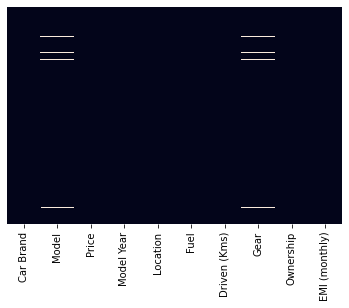

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [10]:
# fill missing values using mode of the categorical column

df['Model'] = df['Model'].fillna(df['Model'].mode()[0])
df['Gear'] = df['Gear'].fillna(df['Gear'].mode()[0])

In [11]:
df.isnull().sum()

Car Brand        0
Model            0
Price            0
Model Year       0
Location         0
Fuel             0
Driven (Kms)     0
Gear             0
Ownership        0
EMI (monthly)    0
dtype: int64

### 3.Exploratory Data Analysis

In [12]:
for i in df.columns:
    print(df[i].value_counts())
    print('------------------------------')


Maruti        2644
Hyundai       1124
Honda          387
Ford           310
Renault        199
Toyota         170
Mahindra       140
Tata           127
Volkswagen      94
MG              73
KIA             57
Jeep            52
Audi            33
Nissan          25
Skoda           25
Datsun          25
Mercedes        19
BMW             13
Jaguar           4
Name: Car Brand, dtype: int64
------------------------------
BalenoDELTA 1.2 K12               269
Alto 800LXI                       169
Wagon R 1.0VXI                    143
Alto K10VXI                       136
SwiftVDI                          132
                                 ... 
New Figo1.5 TREND                   1
Creta1.6 SX VTVT (O) EXECUTIVE      1
Compass2.0 SPORT                    1
NEXONXM SUNROOF 1.2 RTN             1
CretaS PETROL MT                    1
Name: Model, Length: 704, dtype: int64
------------------------------
336699     30
344999     14
475999     11
548699     11
352899     10
           ..
173789

In [13]:
df.columns

Index(['Car Brand', 'Model', 'Price', 'Model Year', 'Location', 'Fuel',
       'Driven (Kms)', 'Gear', 'Ownership', 'EMI (monthly)'],
      dtype='object')

In [14]:
details=['Car Brand','Model Year', 'Location', 'Fuel','Gear', 'Ownership']

Maruti        2644
Hyundai       1124
Honda          387
Ford           310
Renault        199
Toyota         170
Mahindra       140
Tata           127
Volkswagen      94
MG              73
KIA             57
Jeep            52
Audi            33
Nissan          25
Skoda           25
Datsun          25
Mercedes        19
BMW             13
Jaguar           4
Name: Car Brand, dtype: int64


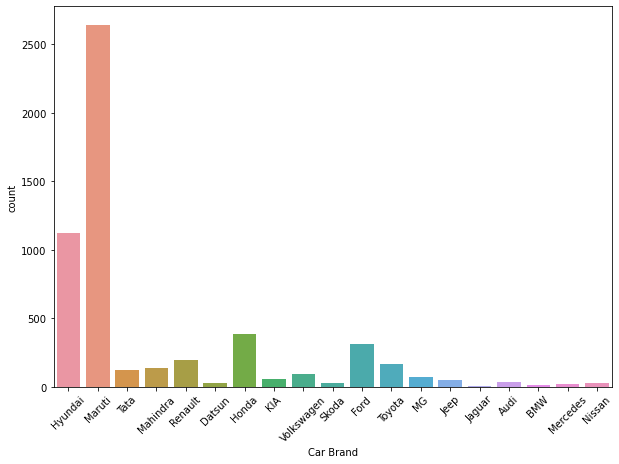

_________________________________________________________--
2018    927
2017    926
2019    823
2016    636
2020    538
2015    508
2014    392
2021    342
2013    268
2012     72
2011     34
2010     29
2009     17
2022      7
2008      2
Name: Model Year, dtype: int64


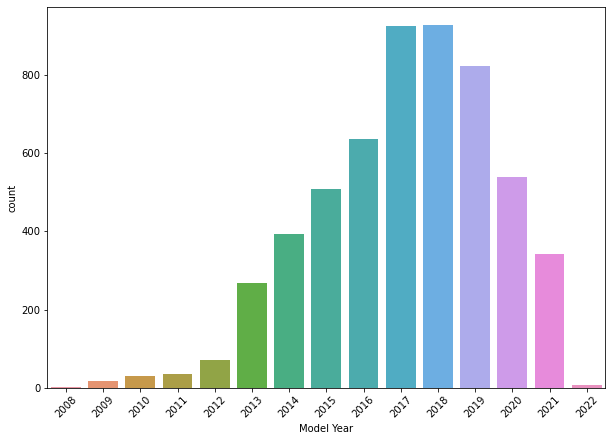

_________________________________________________________--
Ahmedabad     794
Gurgaon       716
Delhi         716
Noida         716
Mumbai        603
Chennai       559
Pune          450
Bangalore     401
Hyderabad     251
Kolkata       170
Chandigarh    145
Name: Location, dtype: int64


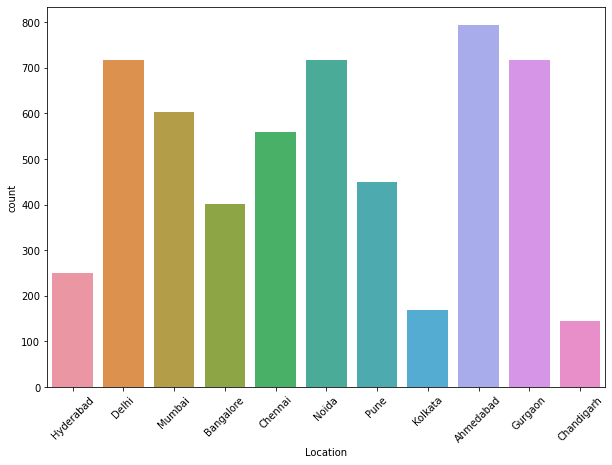

_________________________________________________________--
Petrol          3846
Diesel          1617
Petrol + CNG      57
Petrol + LPG       1
Name: Fuel, dtype: int64


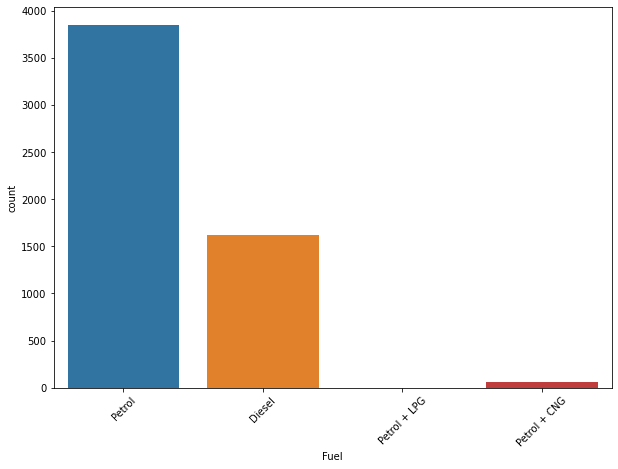

_________________________________________________________--
Manual       4673
Automatic     848
Name: Gear, dtype: int64


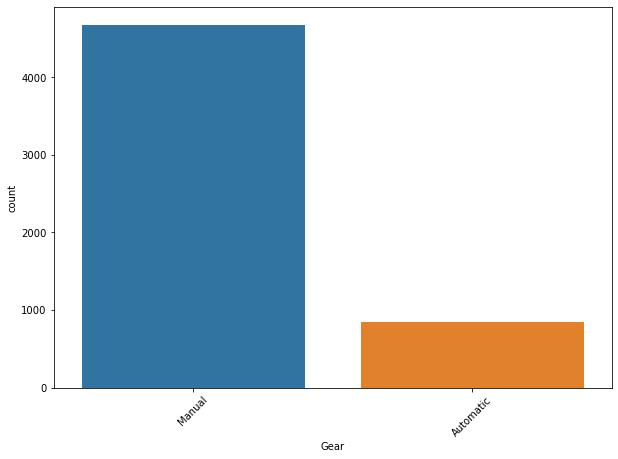

_________________________________________________________--
1    4409
2    1009
3      99
4       4
Name: Ownership, dtype: int64


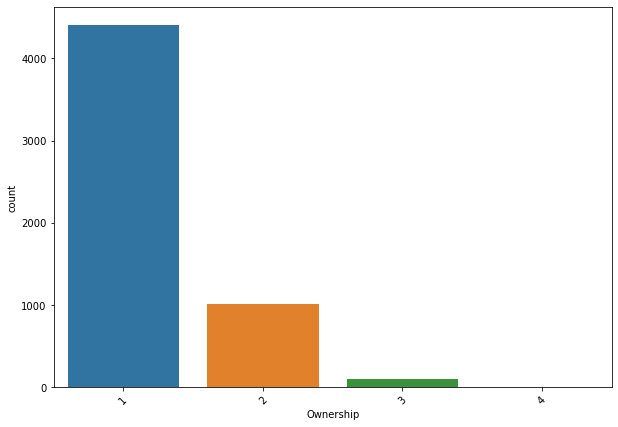

_________________________________________________________--


In [15]:
for column in details:
    print(df[column].value_counts())
    plt.figure(figsize=(10,7))
    sns.countplot(x=df[column])
    plt.xticks(rotation=45)
    plt.show()
    print("_________________________________________________________--")

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Model Year'}>,
        <AxesSubplot:title={'center':'Driven (Kms)'}>,
        <AxesSubplot:title={'center':'Ownership'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

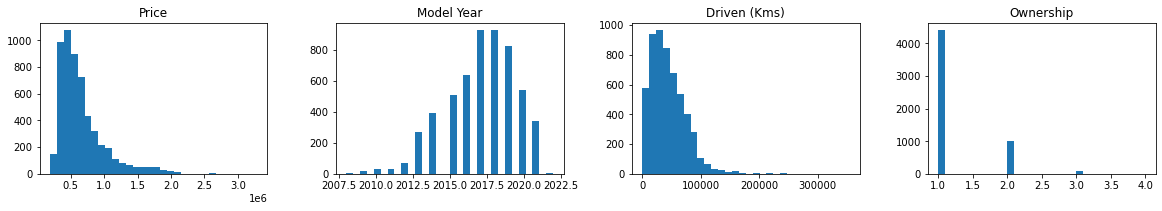

In [16]:
df.hist(figsize=(20,10), grid=False, layout=(3, 4), bins = 30)

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


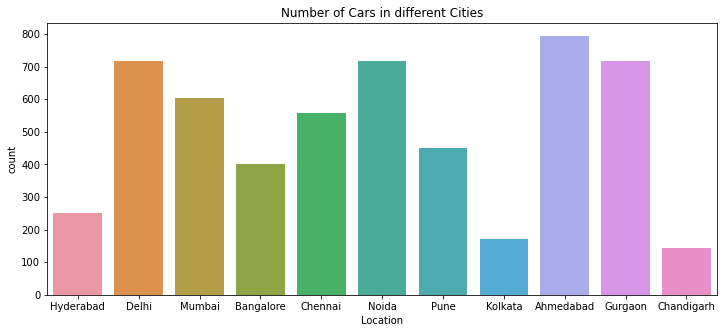

In [17]:
plt.figure(figsize=[12,5])
sns.countplot(df.Location)
plt.title('Number of Cars in different Cities')
plt.show()

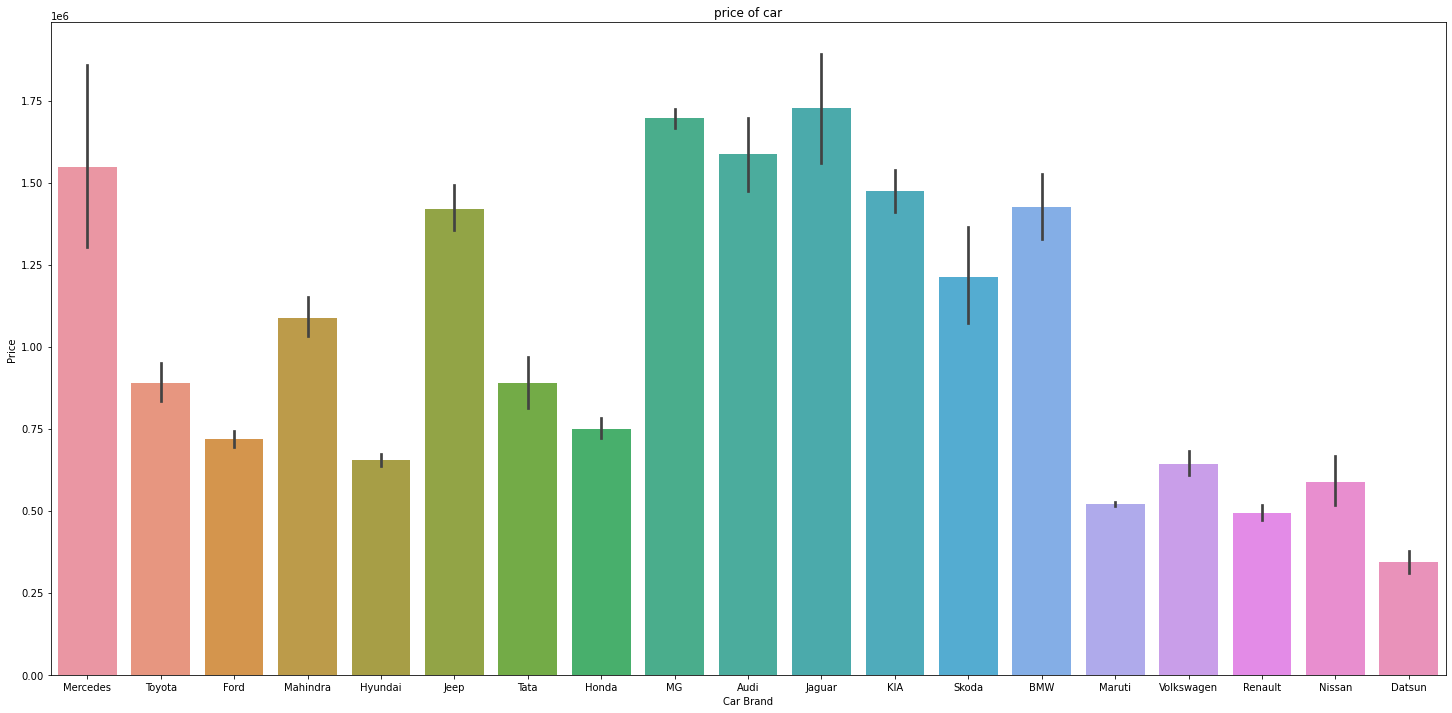

In [18]:
plt.figure(figsize=[25,12])
sns.barplot(x='Car Brand', y='Price', data = df.sort_values('Price', ascending=False))
plt.title('price of car')
plt.show()

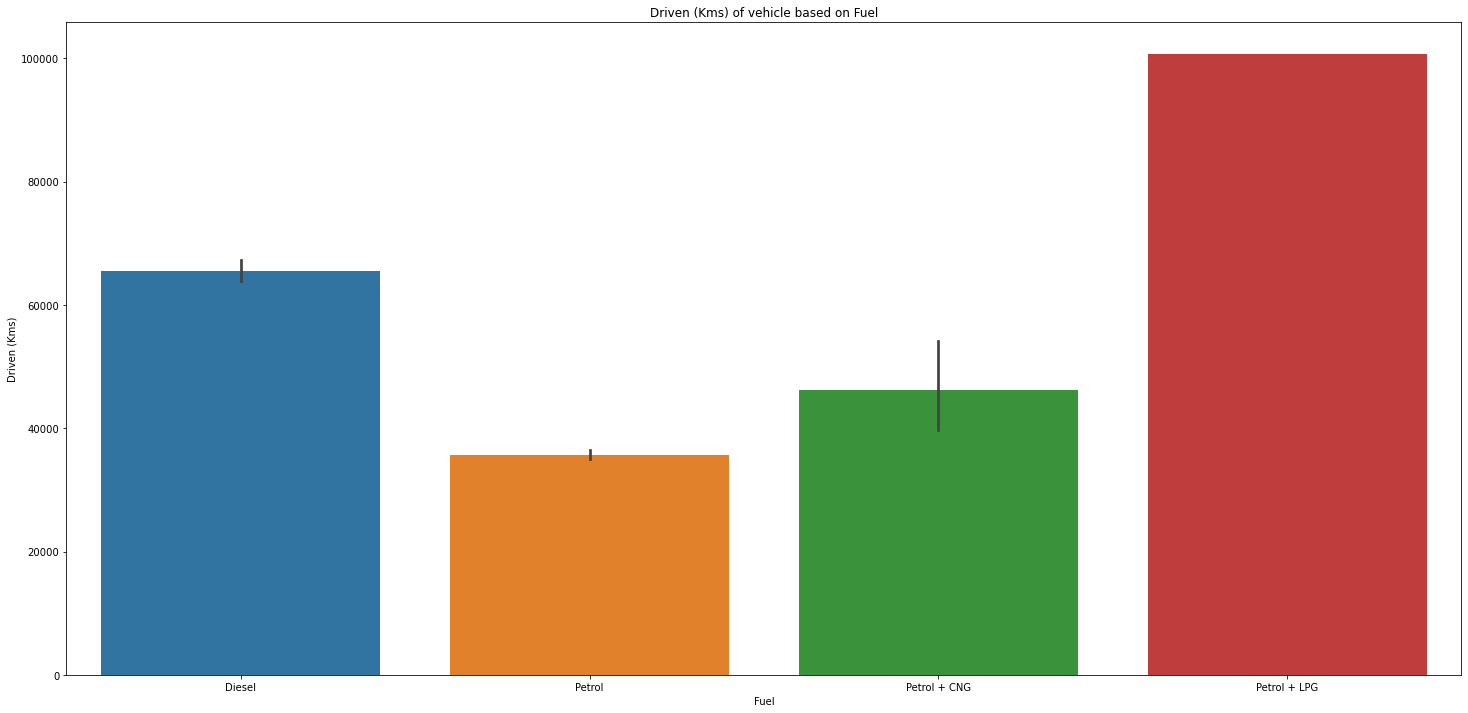

In [19]:
plt.figure(figsize=[25,12])
sns.barplot(x='Fuel', y='Driven (Kms)', data = df.sort_values('Price', ascending=False))
plt.title('Driven (Kms) of vehicle based on Fuel')
plt.show()

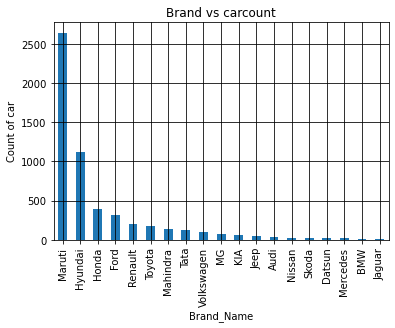

In [20]:
plt.xlabel("Brand_Name")
plt.ylabel("Count of car")
df['Car Brand'].value_counts().plot(kind='bar',title='Brand vs carcount')
plt.grid(color='black')

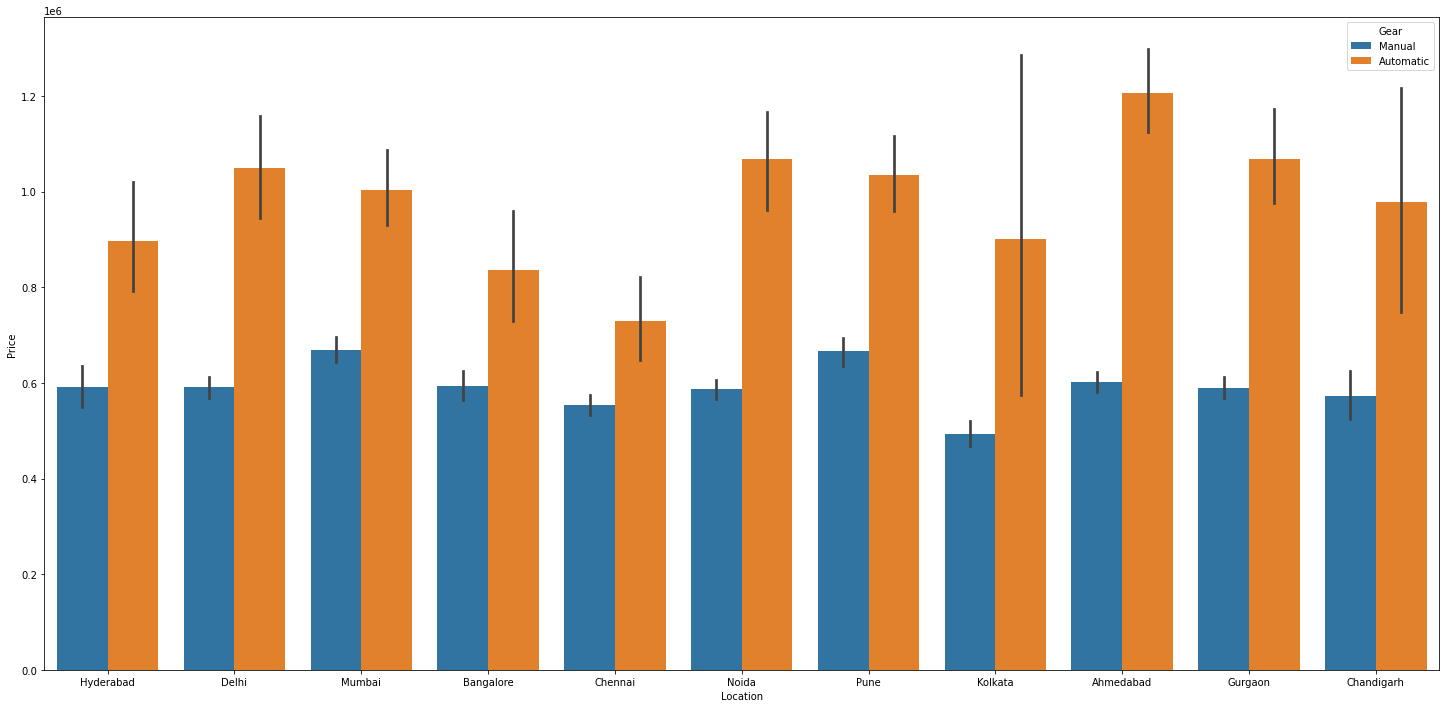

In [21]:
plt.figure(figsize=[25,12])
ax = sns.barplot(x="Location", y="Price", hue='Gear', data=df)

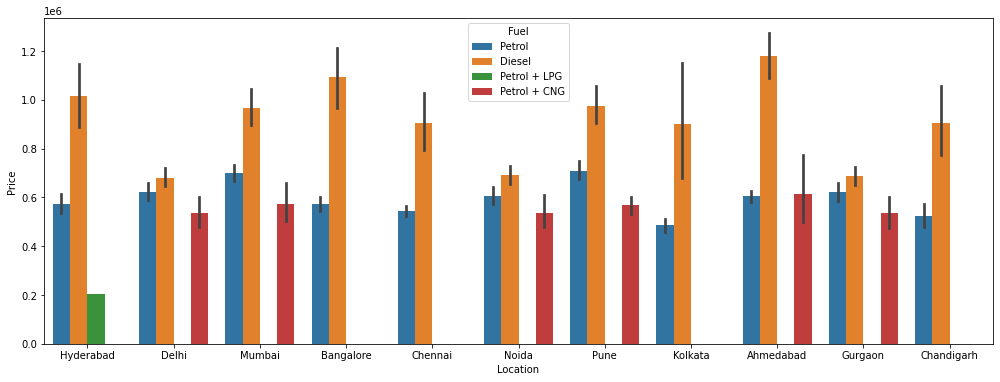

In [22]:
plt.figure(figsize=[17,6])
ax = sns.barplot(x="Location", y='Price', hue='Fuel', data=df)

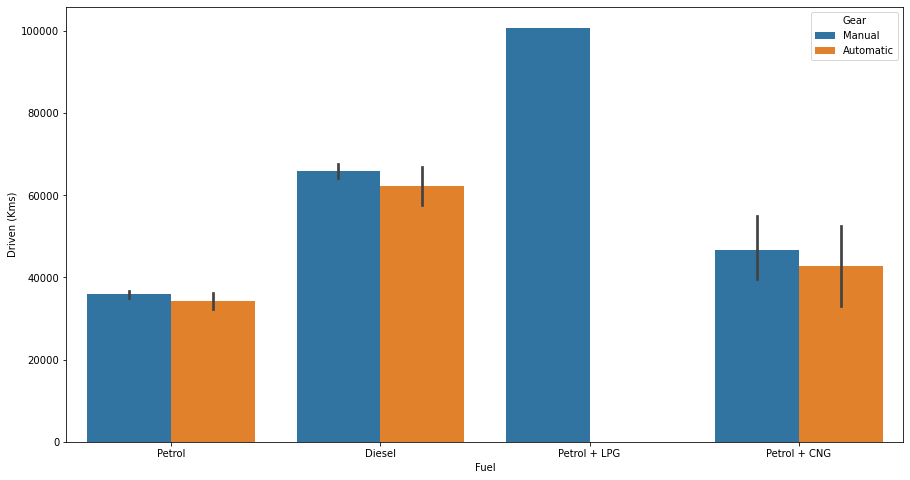

In [23]:
plt.figure(figsize=[15,8])
ax = sns.barplot(x='Fuel', y='Driven (Kms)',hue='Gear', data=df)

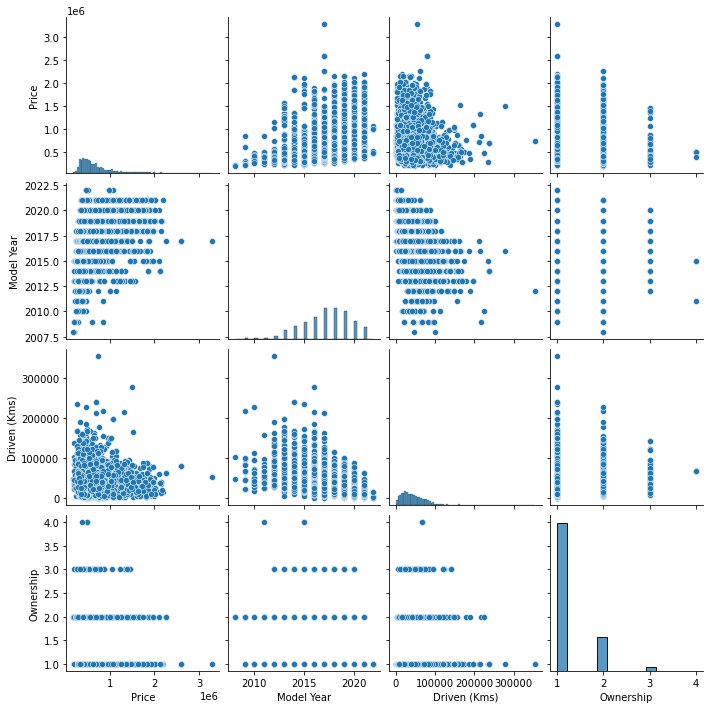

In [24]:
sns.pairplot(df)

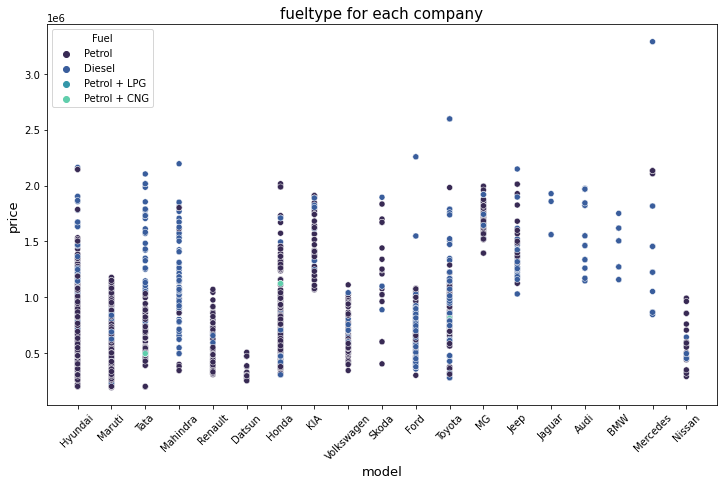

In [25]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="Car Brand",y="Price",data=df[0:10000],hue="Fuel",palette="mako")
plt.title("fueltype for each company",size=15)
plt.xlabel("model",size=13)
plt.ylabel("price" , size=13)
plt.xticks(rotation=45)
plt.show()

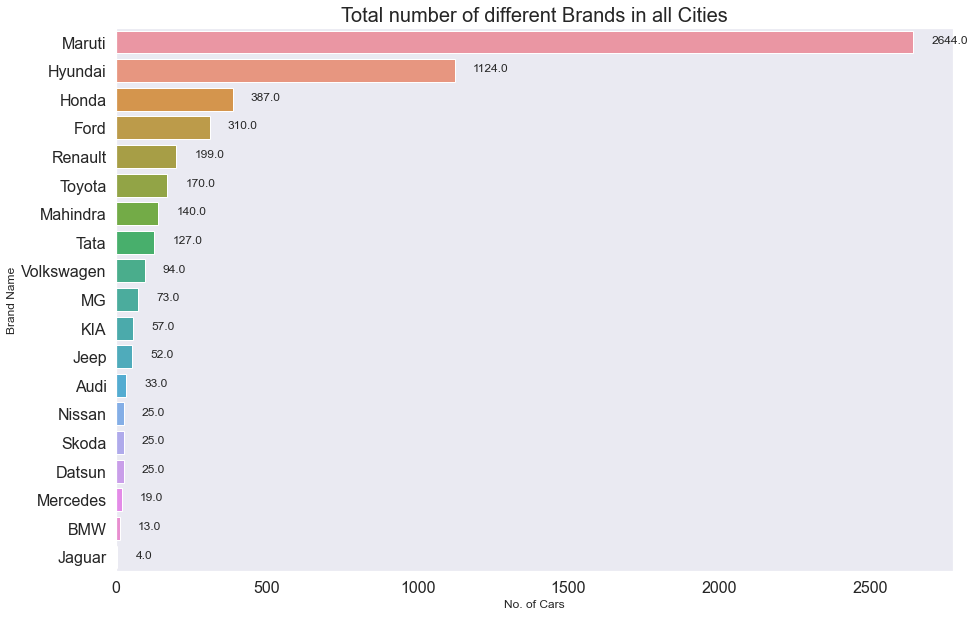

In [26]:
brand_count = df['Car Brand'].value_counts().sort_values(ascending=False).reset_index().rename(
    columns = {'index':'Brand','Car Brand':'Count'})
plt.figure(figsize=(15,10))
sns.set(rc={'figure.figsize':(15,10)})
a = sns.barplot(y ='Brand',x='Count',data=brand_count)
plt.xticks(rotation=0,fontsize=16)
plt.yticks(fontsize=16)
for p in a.patches:
    width = p.get_width()
    plt.text(60+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width))
a.set_xlabel("No. of Cars")
a.set_ylabel("Brand Name")
plt.title("Total number of different Brands in all Cities",fontsize=20)
plt.grid(False)

### Correlation

In [27]:
df_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

<AxesSubplot:>

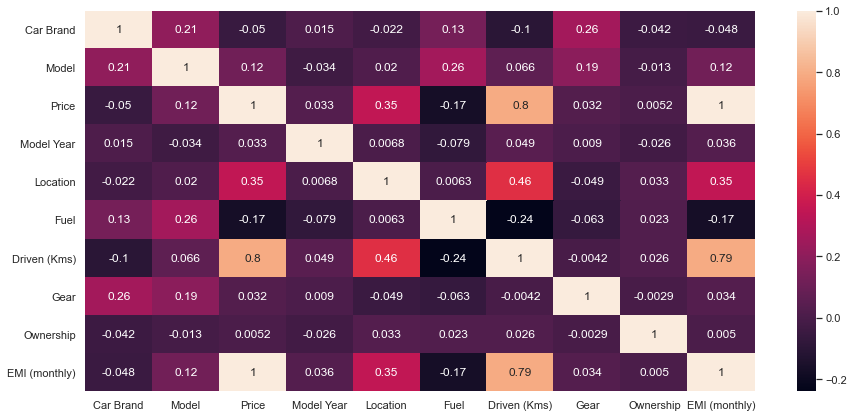

In [28]:
plt.figure(figsize=[15,7])
sns.heatmap(df_corr,annot=True)

Outcome of correlation From heatmap partner dataset has positive correlation .

1.Driven(kms) has 80 percent correlation with target column which can be considered as a good bond.

2.Location has 35 percent correlation with target column which can be considered as a good bond.

3.Model since the has 12 percent correlation with target column which can be considered as a good bond.

4.Model year has 3.3  percent correlation with target column which can be considered as a bad bond

5.Gear has 3.2 percent correlation with target column which can be considered as a  bad bond.

max correlation :Driven(kms

min correlation: Car brand and fuel

In [29]:
hyd_city = df.loc[(df['Location'] == 'Hyderabad')]
hyd_brands = hyd_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})


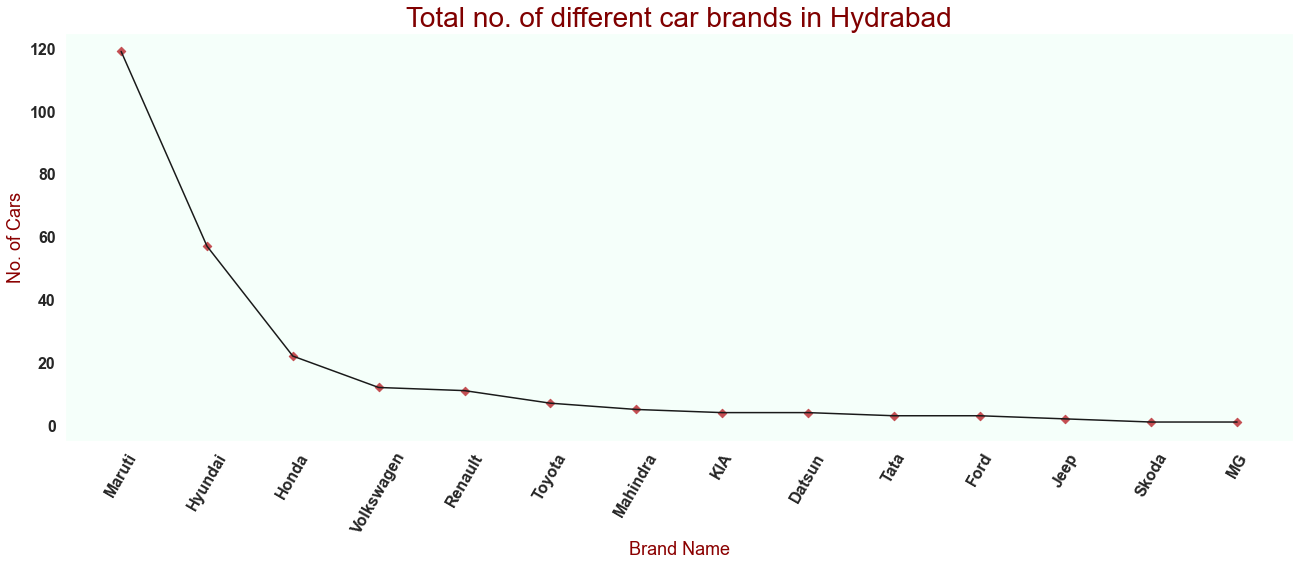

In [30]:
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=hyd_brands,color='k')
plt.scatter('Brand','Count',data=hyd_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Hydrabad",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

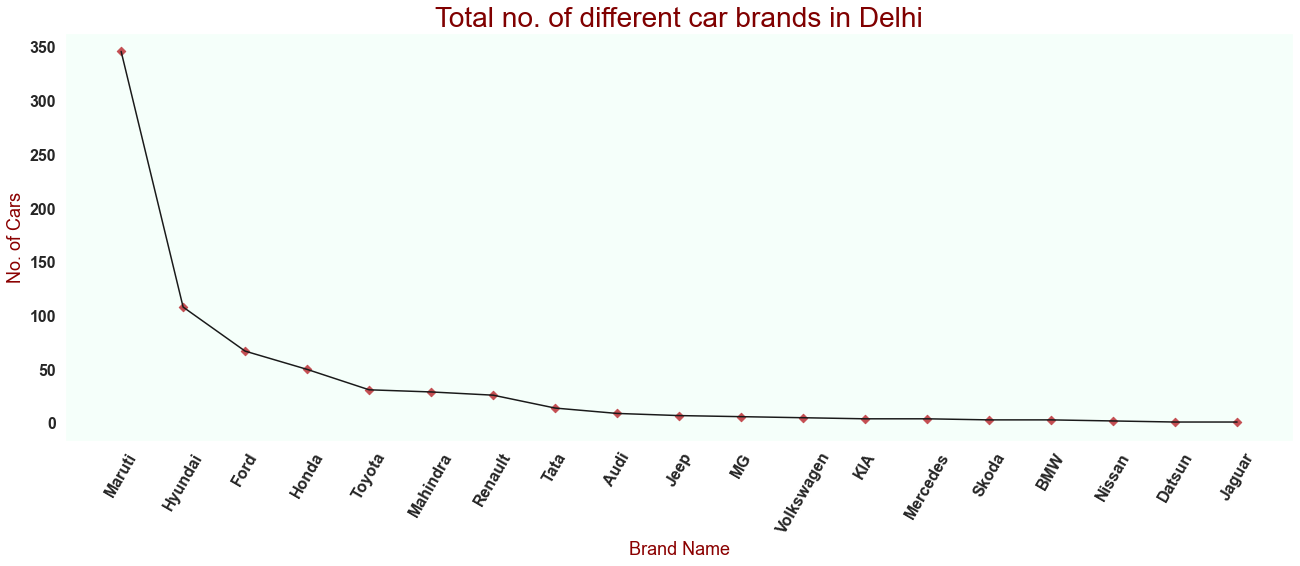

In [31]:
delhi_city = df.loc[(df['Location'] == 'Delhi')]
delhi_brands = delhi_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=delhi_brands,color='k')
plt.scatter('Brand','Count',data=delhi_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Delhi",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

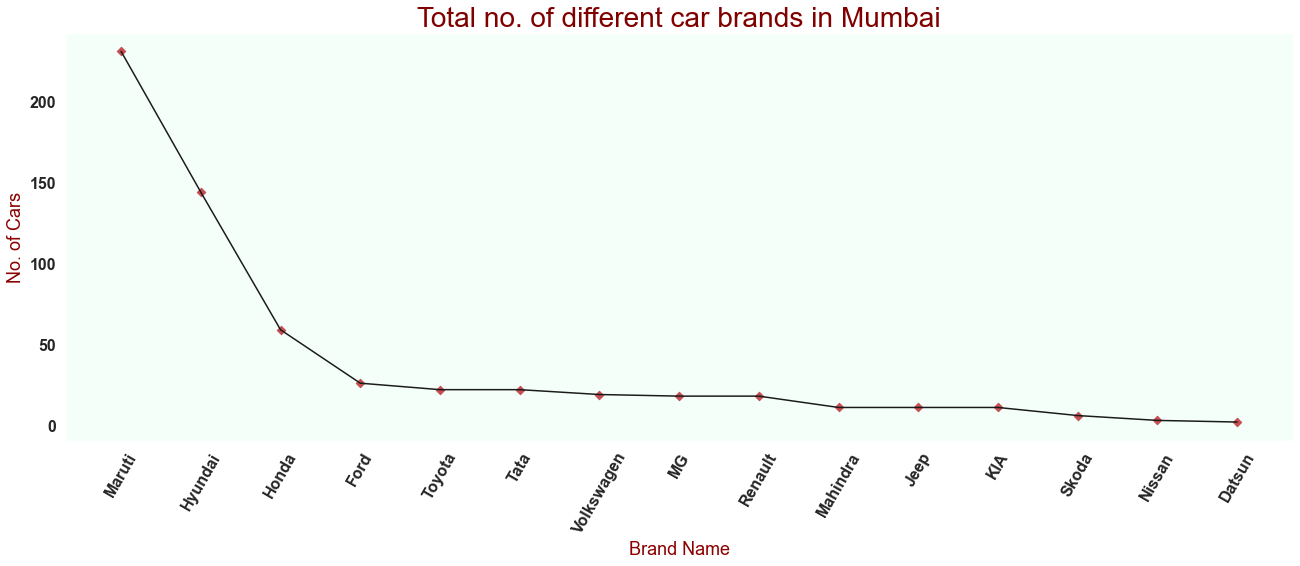

In [32]:
mumbai_city = df.loc[(df['Location'] == 'Mumbai')]
mumbai_brands = mumbai_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=mumbai_brands,color='k')
plt.scatter('Brand','Count',data=mumbai_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Mumbai",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

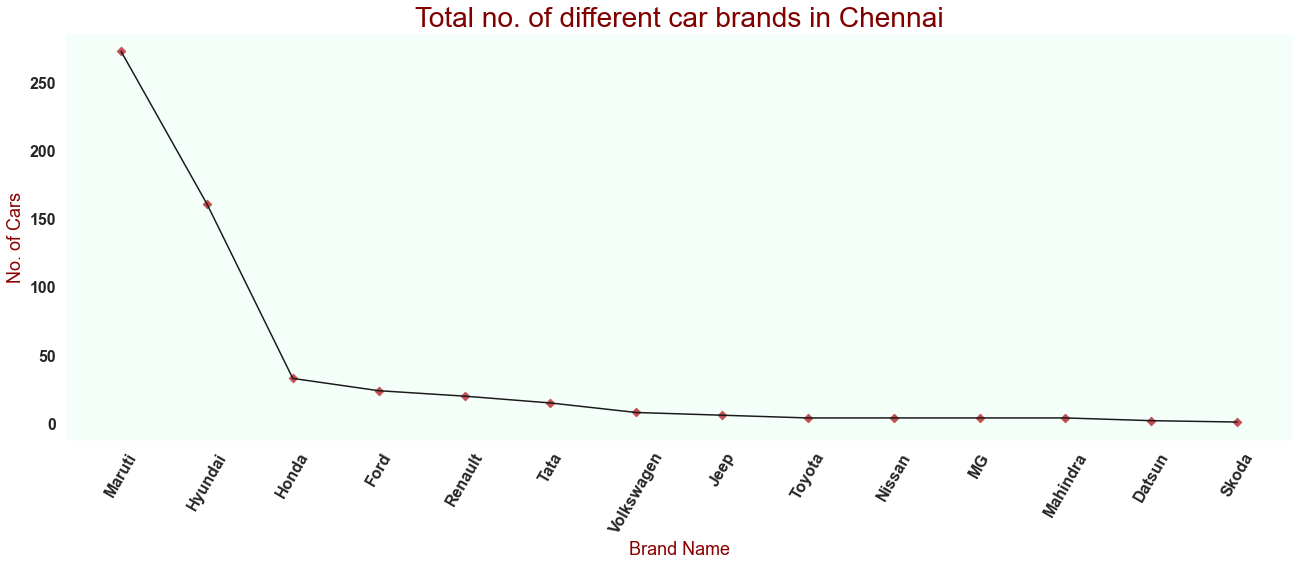

In [33]:
chennai_city = df.loc[(df['Location'] == 'Chennai')]
chennai_brands = chennai_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=chennai_brands,color='k')
plt.scatter('Brand','Count',data=chennai_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Chennai",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

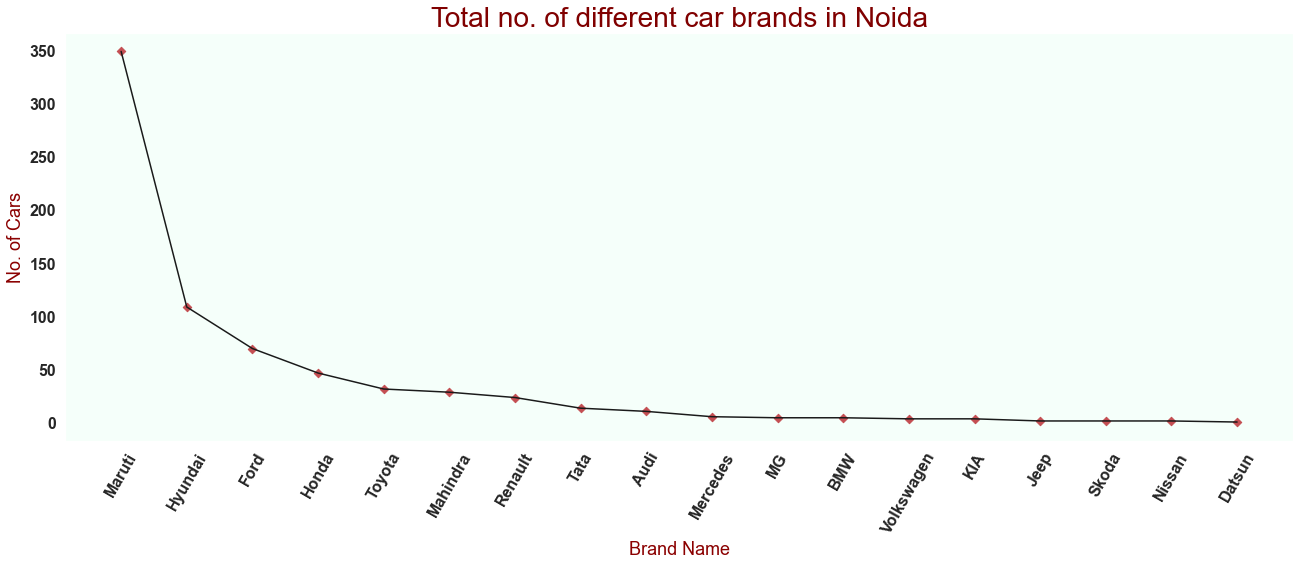

In [34]:
Noida_city = df.loc[(df['Location'] == 'Noida')]
Noida_brands = Noida_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=Noida_brands,color='k')
plt.scatter('Brand','Count',data=Noida_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Noida",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

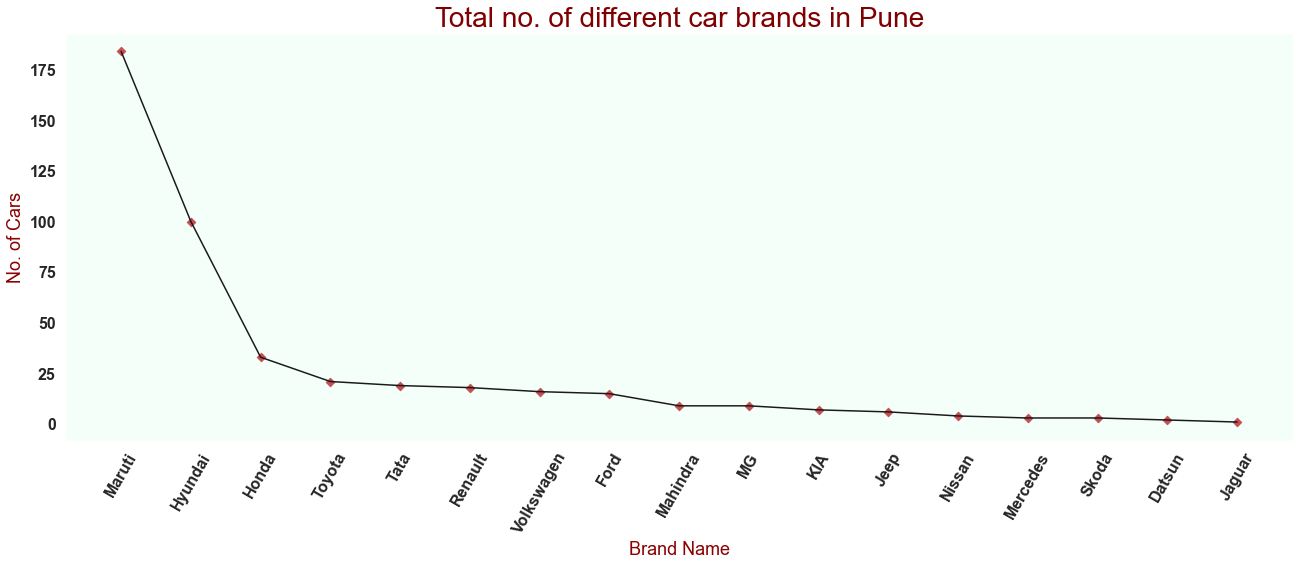

In [35]:
Pune_city = df.loc[(df['Location'] == 'Pune')]
Pune_brands = Pune_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=Pune_brands,color='k')
plt.scatter('Brand','Count',data=Pune_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Pune",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

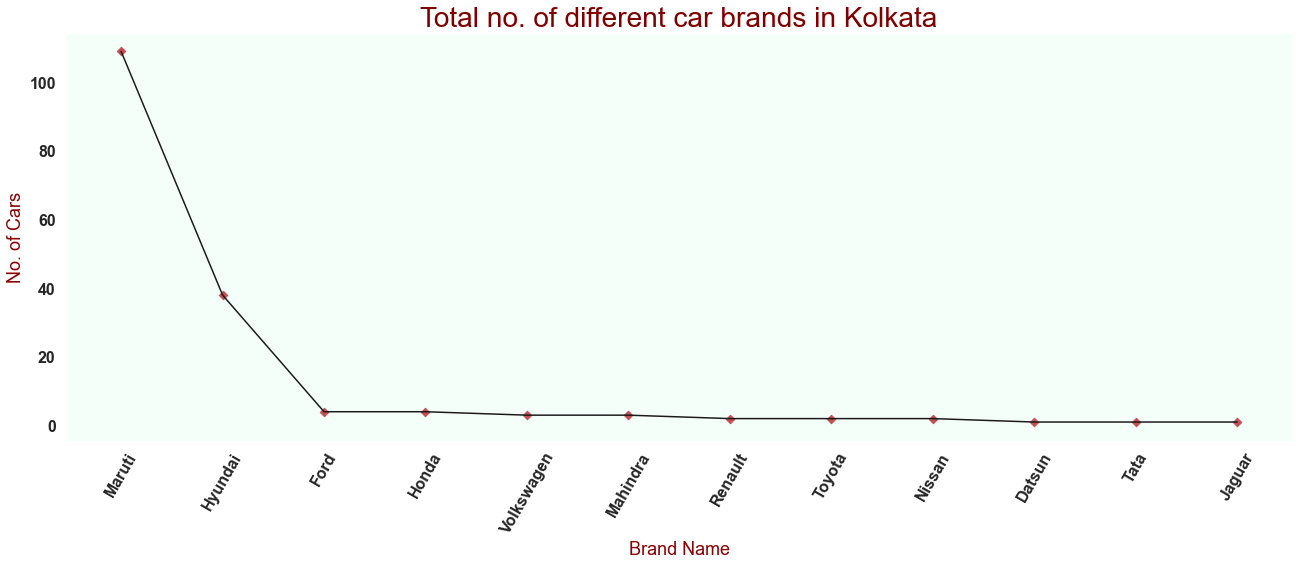

In [36]:
Kolkata_city = df.loc[(df['Location'] == 'Kolkata')]
Kolkata_brands = Kolkata_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=Kolkata_brands,color='k')
plt.scatter('Brand','Count',data=Kolkata_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Kolkata",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

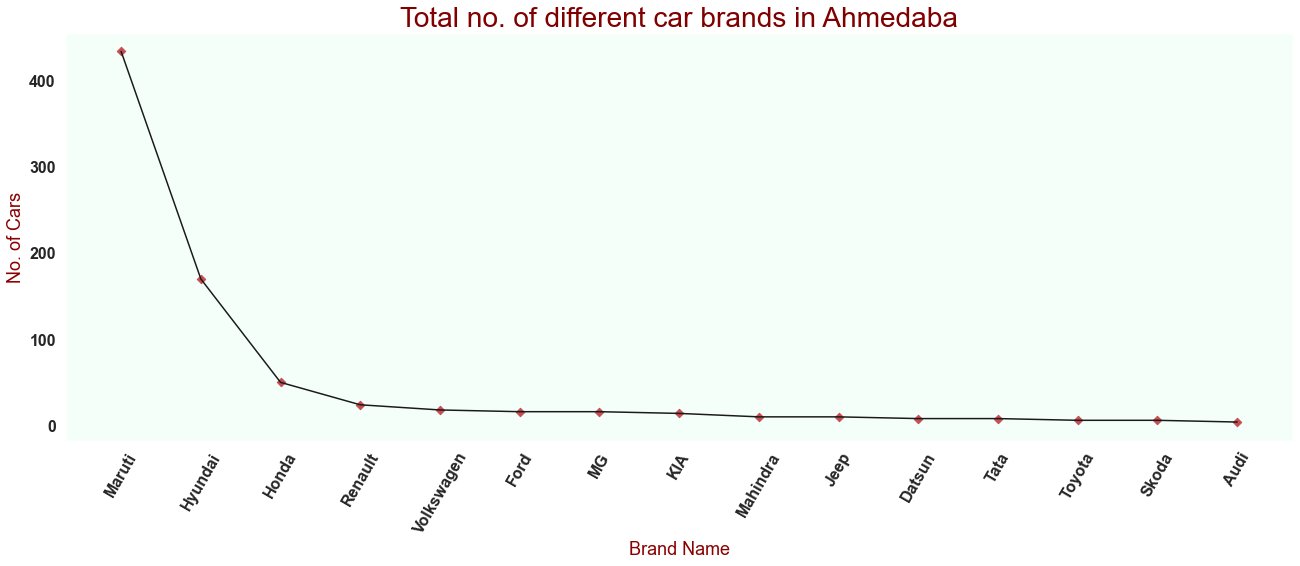

In [37]:
Ahmedabad_city = df.loc[(df['Location'] == 'Ahmedabad')]
Ahmedabad_brands = Ahmedabad_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=Ahmedabad_brands,color='k')
plt.scatter('Brand','Count',data=Ahmedabad_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Ahmedaba",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

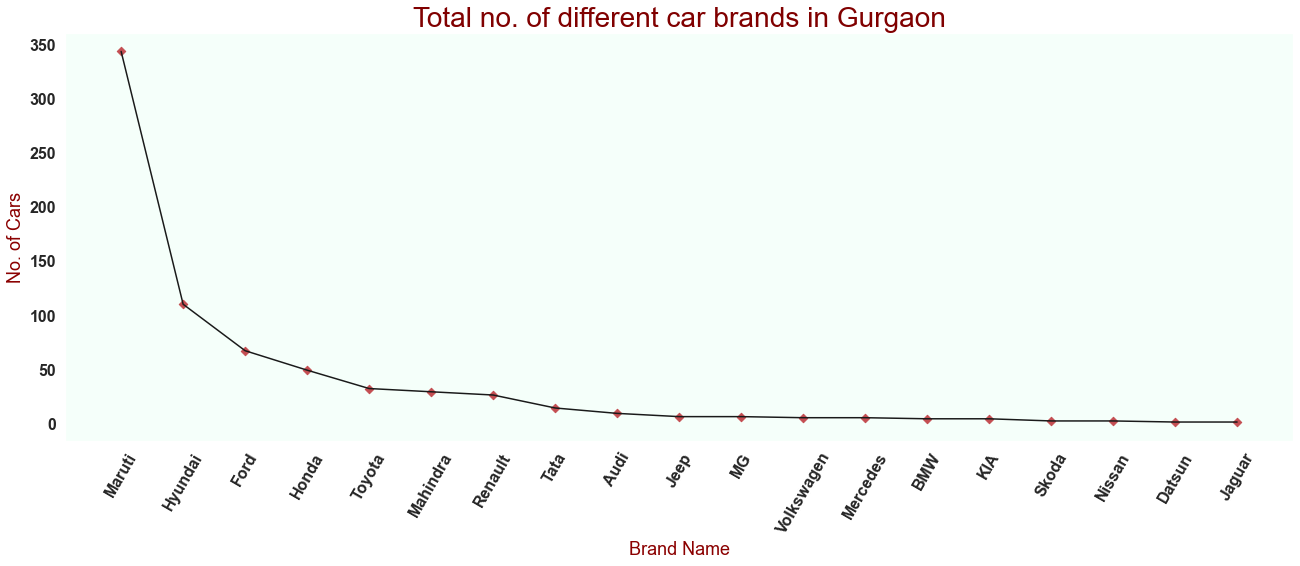

In [38]:
Gurgaon_city = df.loc[(df['Location'] == 'Gurgaon')]
Gurgaon_brands = Gurgaon_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=Gurgaon_brands,color='k')
plt.scatter('Brand','Count',data=Gurgaon_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Gurgaon",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

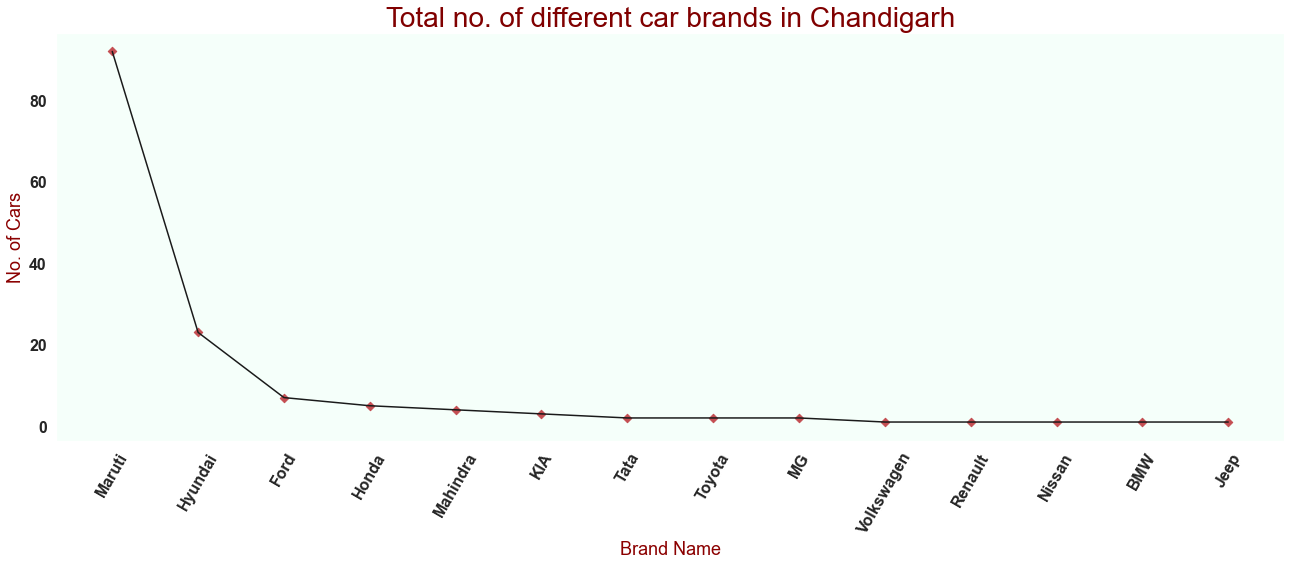

In [39]:
Chandigarh_city = df.loc[(df['Location'] == 'Chandigarh')]
Chandigarh_brands = Chandigarh_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=Chandigarh_brands,color='k')
plt.scatter('Brand','Count',data=Chandigarh_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Chandigarh",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

### 4.Data Pre processing

### Encoding

In [40]:
categ_columns=['Car Brand','Model','Gear','Fuel','Location' ]
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5521 entries, 0 to 5520
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Car Brand      5521 non-null   int32
 1   Model          5521 non-null   int32
 2   Price          5521 non-null   int64
 3   Model Year     5521 non-null   int64
 4   Location       5521 non-null   int32
 5   Fuel           5521 non-null   int32
 6   Driven (Kms)   5521 non-null   int64
 7   Gear           5521 non-null   int32
 8   Ownership      5521 non-null   int64
 9   EMI (monthly)  5521 non-null   int32
dtypes: int32(6), int64(4)
memory usage: 302.1 KB


### Skewness removal

In [42]:
df.skew()

Car Brand       -0.032247
Model            0.094228
Price            1.793917
Model Year      -0.508773
Location        -0.017386
Fuel            -0.647378
Driven (Kms)     1.510913
Gear            -1.922001
Ownership        1.988674
EMI (monthly)    0.016610
dtype: float64

There is not much skewness present in the data.

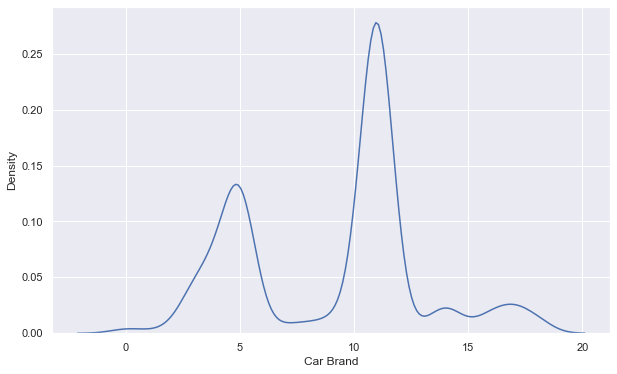

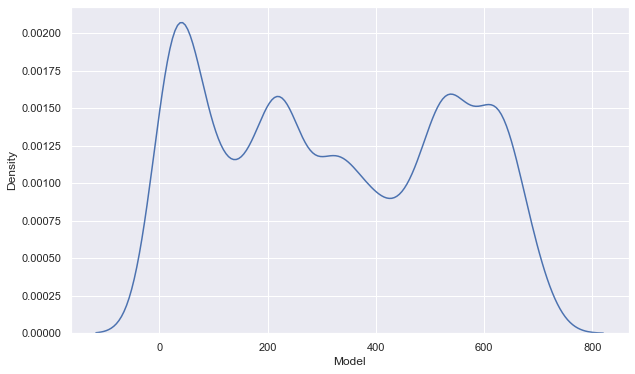

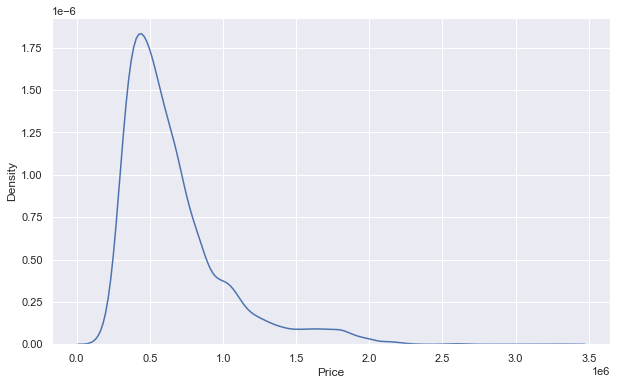

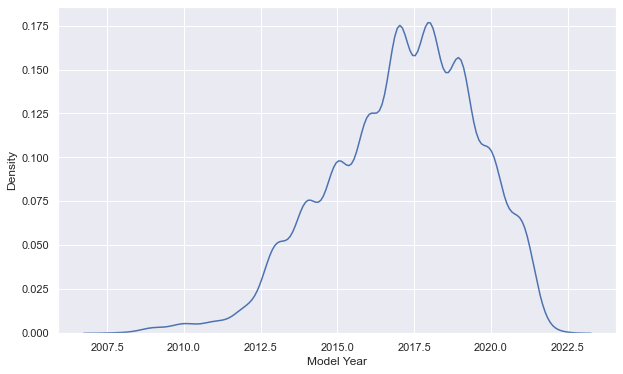

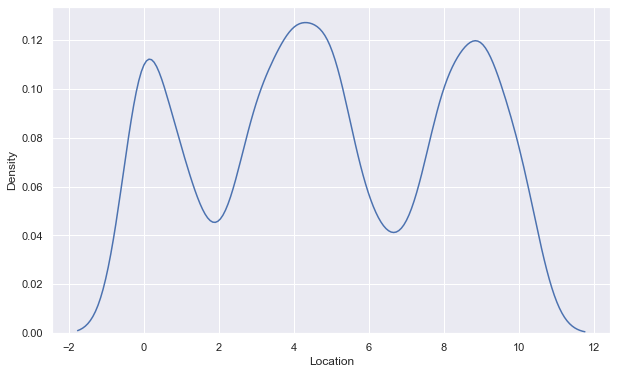

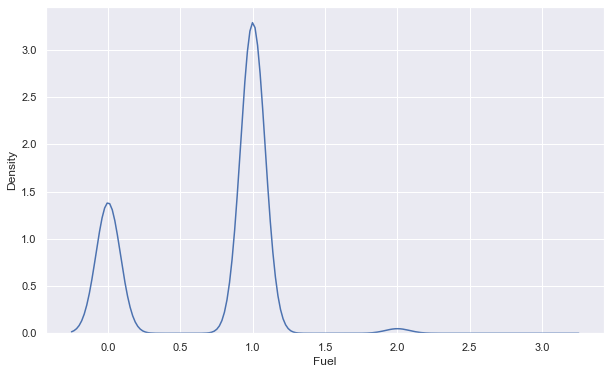

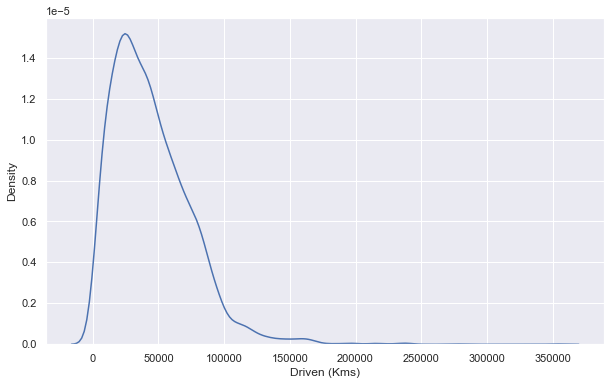

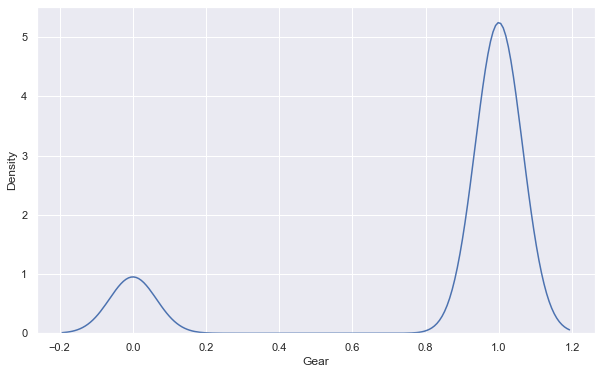

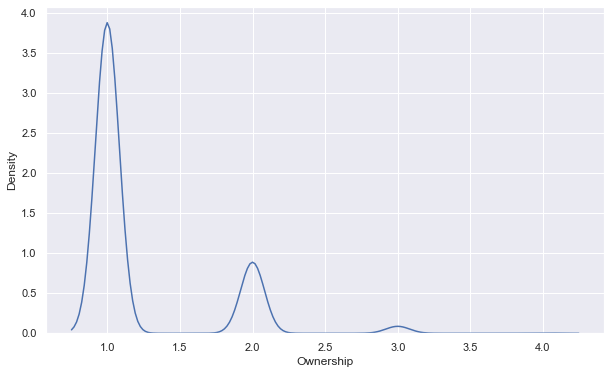

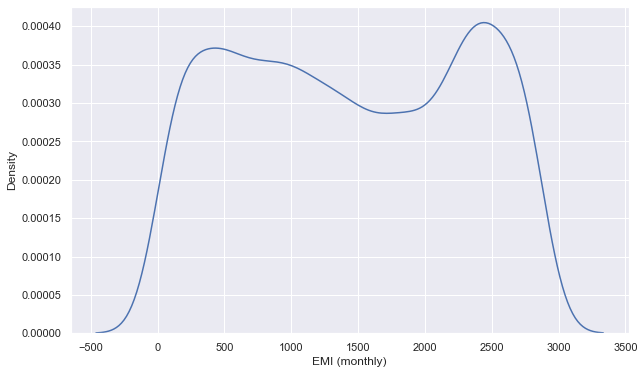

In [43]:
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.kdeplot(x=i,data=df)

### Outliers checking

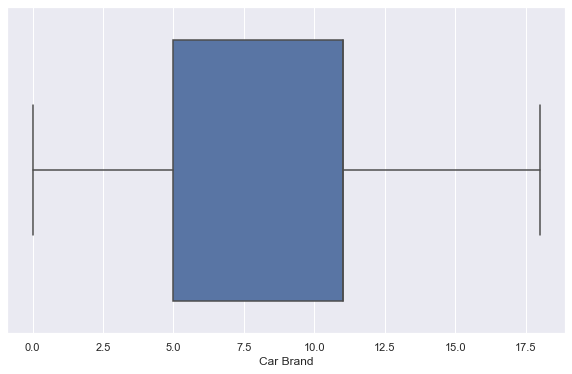

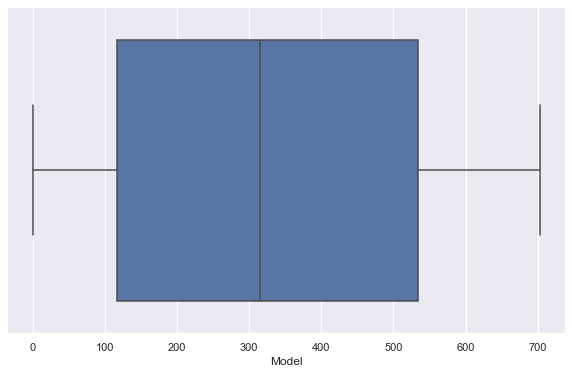

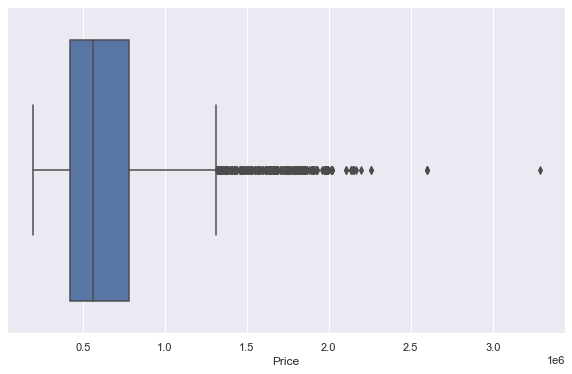

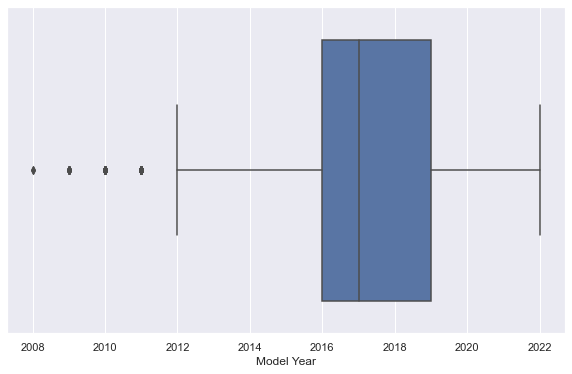

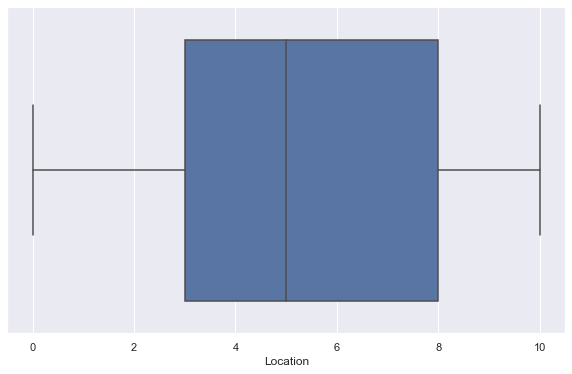

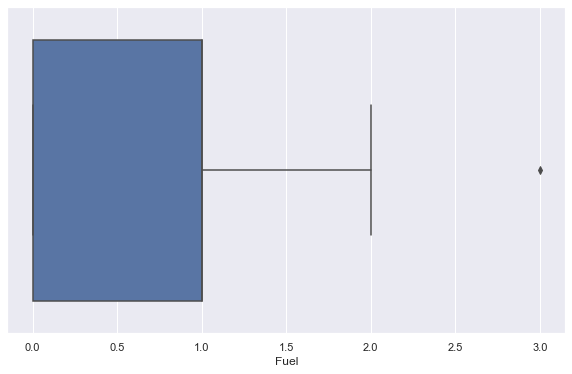

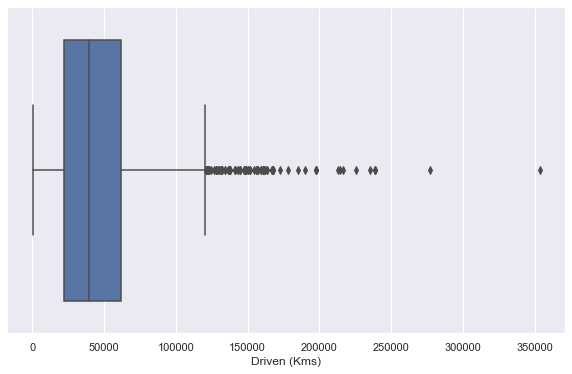

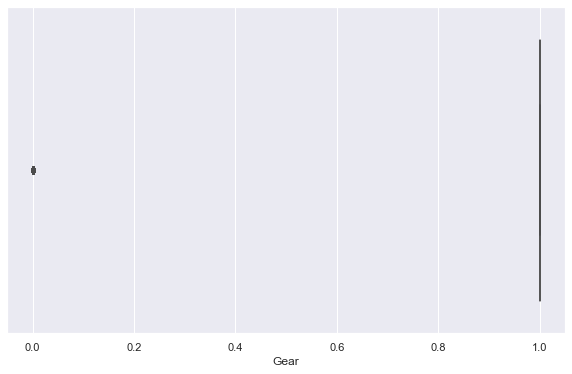

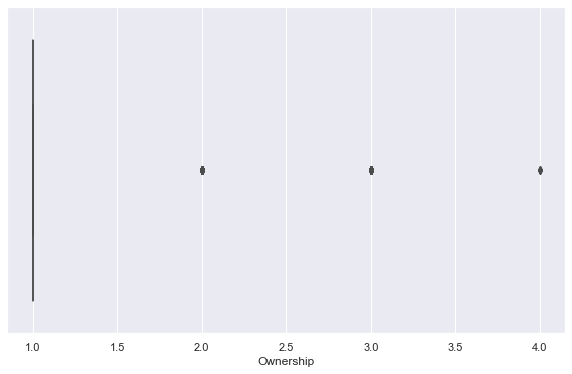

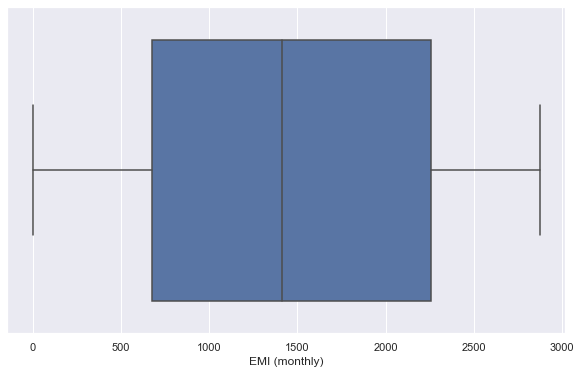

In [44]:
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.boxplot(x=i,data=df)

### Removing outliers

Z Score_Technique

In [45]:
from scipy import stats
import numpy as np
print("Old Shape: ", df.shape)   
z = np.abs(stats.zscore(df))
print(z)

Old Shape:  (5521, 10)
[[1.0518585  1.42239029 1.17276397 ... 0.42599062 1.69131686 0.76237252]
 [0.4717702  1.04322825 0.16709201 ... 0.42599062 0.47924576 0.41468883]
 [1.0518585  1.67486104 1.08038988 ... 0.42599062 0.47924576 0.80768881]
 ...
 [0.4717702  1.39498098 1.0021165  ... 0.42599062 0.47924576 0.90645506]
 [0.4717702  1.3721399  0.86283594 ... 0.42599062 0.47924576 1.15511363]
 [0.4717702  1.41325385 0.92931076 ... 0.42599062 0.47924576 1.02846043]]


In [46]:
threshold = 3
print(np.where(z > 3))

(array([   0,    2,    7,    7,    8,    9,   17,   19,   43,   50,  105,
        114,  170,  172,  175,  192,  198,  208,  208,  251,  253,  254,
        255,  257,  260,  262,  265,  266,  273,  282,  283,  303,  332,
        347,  370,  379,  401,  421,  436,  491,  520,  520,  544,  559,
        573,  581,  605,  614,  633,  638,  651,  750,  753,  759,  761,
        779,  781,  783,  791,  796,  865,  867,  878,  879,  889,  895,
        897,  902,  907,  931,  951,  971,  986,  989, 1032, 1043, 1052,
       1074, 1140, 1164, 1179, 1204, 1224, 1231, 1267, 1270, 1275, 1332,
       1353, 1372, 1405, 1408, 1431, 1461, 1465, 1467, 1483, 1485, 1497,
       1509, 1514, 1516, 1517, 1518, 1522, 1523, 1524, 1531, 1542, 1548,
       1555, 1560, 1561, 1570, 1571, 1574, 1578, 1587, 1589, 1590, 1591,
       1595, 1599, 1611, 1635, 1637, 1647, 1658, 1661, 1665, 1678, 1690,
       1694, 1707, 1708, 1719, 1723, 1731, 1732, 1811, 1847, 1868, 1878,
       1890, 1899, 1918, 1923, 1928, 1935, 1948, 1

Due to heavy loss of data we don't remove outliers

### 5. Feature Engineering

In [47]:
x= df.drop(columns='Price')
y= df['Price']
x= pd.get_dummies(x, prefix_sep="_")
x.head()

,Car Brand,Model,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,5,9,2009,6,1,83525,1,2,2100
1,11,92,2021,6,1,2072,1,1,1087
2,5,687,2009,6,1,82752,1,1,2139
3,5,169,2016,6,0,44442,1,1,1733
4,11,538,2013,6,1,61650,1,1,2782


In [48]:
x.shape

(5521, 9)

In [49]:
y.shape

(5521,)

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

### Scaling

In [51]:
#data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

#fit scaler on training data
norm = MinMaxScaler().fit(x_train)

#transform training data
x_train_norm = norm.transform(x_train)

#transform testing dataabs
x_test_norm = norm.transform(x_test)

In [52]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

### 5. Model Building and evaluation

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

##### Finding best random state

In [54]:
from sklearn.metrics import r2_score
d=5
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  lm=LinearRegression()
  lm.fit(x_train,y_train)
  pred_train=lm.predict(x_train)
  pred_test = lm.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)

0 -0.001154628710912653
least value 0 -0.001154628710912653
1 0.030801328395919536
2 -0.03480221011476137
least value 2 -0.03480221011476137
3 0.022135886518502623
4 -0.041308155723487894
least value 4 -0.041308155723487894
5 0.0018070674454440105
6 -0.00013138130621492827
7 0.006351254209416846
8 0.02798600103180271
9 0.020530669607426444
10 -0.012920595736649276
11 0.008918664533372866
12 0.015204746373467692
13 0.03397985202410614
14 0.0007560968297416482
15 -0.009940956560162029
16 0.04545515397304756
17 0.027063587509262188
18 -0.017865320911705895
19 0.01137954272800612
20 0.020683143099350598
21 -0.015502938879308092
22 -0.0035955351496627097
23 0.01477395930801717
24 0.020453838830253757
25 -0.002836936876127627
26 0.024168490747550564
27 0.013432348491553059
28 -0.0005728450355281245
29 -0.022687450574861767
30 -0.023910393469869562
31 -0.003991074776470094
32 0.008565659468285913
33 -0.012465080799664463
34 -0.011597187783806473
35 -0.007484839027343648
36 -0.0049724703576844

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=45)

### LinearRegression

In [56]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.4160785953303573


In [57]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))
print('r2_score:',r2_score(y_test,LR_predict))

Mean Absolute Error:  189117.6136137874
Mean Squared Error:  64443041637.152245
Root Mean Squared Error:  253856.340549438
Explained Variance Score:  0.46959009510783734
r2_score: 0.4695643213420052


#### C-V Score

In [58]:
ln_cv=cross_val_score(LR,x,y, cv = 10).mean()
ln_cv

0.39787322572201933

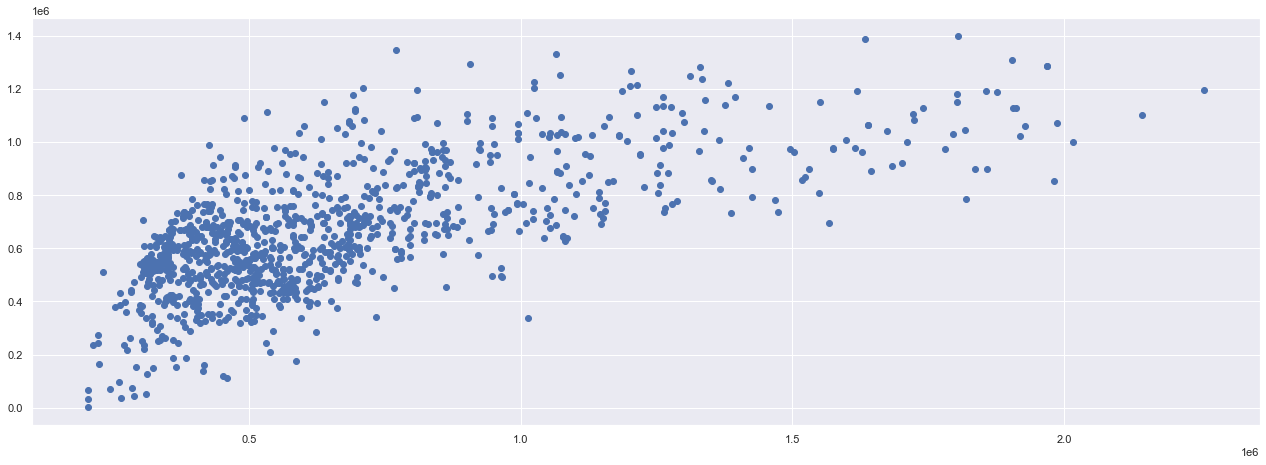

In [59]:
plt.scatter(y_test,LR_predict)

#### Lasso-Rigid regression

In [60]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.4160785953303523

In [61]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))

Mean Absolute Error:  189117.6136137874
Mean Squared Error:  64443041637.152245
Root Mean Squared Error:  253856.340549438
Explained Variance Score:  0.46959009510783734


In [62]:
from sklearn.metrics import r2_score
print(r2_score(y_test,LR_predict))

0.4695643213420052


In [63]:
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)

Ridge(alpha=0.001)

In [64]:
rd.score(x_train,y_train)

0.4160785953296994

In [65]:
from sklearn.metrics import r2_score
print(r2_score(y_test,LR_predict))

0.4695643213420052


### RandomForestRegressor

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predictions1=rf.predict(x_test)
print(rf.score(x_train,y_train))

0.9949478756234339


In [67]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  1477.3448868778273
Mean Squared Error:  321774845.2964197
Root Mean Squared Error:  17938.083657303523
Explained Variance Score:  0.9973524932872979
r2_score: 0.9973514462678391


#### C-V score

In [68]:
rfr_cv=cross_val_score(rf,x,y, cv = 10).mean()
rfr_cv

0.9669147099220101

### DecisionTreeRegressor

In [69]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [70]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Mean Absolute Error:  475.2443438914027
Mean Squared Error:  2961964.288687783
Root Mean Squared Error:  1721.035818537134
Explained Variance Score:  0.9999762696170432
r2_score: 0.999975619841992


#### C-V score

In [71]:
DTR_cv=cross_val_score(DTR,x,y, cv = 10).mean()
DTR_cv

0.9567081222491909

### GradientBoostingRegressor

In [72]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.9922688545819536


In [73]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_PRED))
print('r2_score:',r2_score(y_test,GBR_PRED))

Mean Absolute Error:  9740.907406435197
Mean Squared Error:  1492251531.5364187
Root Mean Squared Error:  38629.67164675903
Explained Variance Score:  0.9877183292106853
r2_score: 0.9877171617951283


#### C-V score

In [74]:
gbr_cv=cross_val_score(GBR,x,y, cv = 10).mean()
gbr_cv

0.9684554487817574

### Ridge

In [75]:
from sklearn.linear_model import Ridge
R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.41607793489427847


In [76]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,R_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,R_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,R_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,R_predict))
print('r2_score:',r2_score(y_test,R_predict))

Mean Absolute Error:  189095.43216053388
Mean Squared Error:  64445503858.0229
Root Mean Squared Error:  253861.1901374901
Explained Variance Score:  0.46956985559208364
r2_score: 0.4695440546108679


### C-V score

In [77]:
rd_cv=cross_val_score(R,x,y, cv = 10).mean()
rd_cv

0.3979085688739953

## After evaluating the model based on MAE,MSE,RMSE,EVS,R2 SCORE the 2 best models choosen for hyper parameter tuning are
1.GradientBoostingRegressor

2.DecisionTreeRegressor



### 6.Hyper parametertuning 


#### GradientBoostingRegressor

In [78]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import GridSearchCV
parameter = {"loss":['ls', 'lad', 'huber', 'quantile'],
             "criterion":['friedman_mse', 'mse', 'mae']}
GBR = GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor(criterion='mse',loss='ls')
GBR.fit(x_train,y_train)
GBR_final=GBR.predict(x_test)

In [80]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_final))
print('r2_score:',r2_score(y_test,GBR_final))

Mean Absolute Error:  9738.317931805668
Mean Squared Error:  1492216288.463552
Root Mean Squared Error:  38629.21547823036
Explained Variance Score:  0.9877186354083275
r2_score: 0.987717451883597


#### DecisionTreeRegressor

In [81]:
from sklearn.model_selection import GridSearchCV
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [83]:
GCV.best_params_

{'criterion': 'friedman_mse', 'max_depth': 11}

In [84]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(criterion='mse',max_depth=9)
DTR.fit(x_train,y_train)
DTR_final=DTR.predict(x_test)

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [85]:
from sklearn.model_selection import GridSearchCV
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [86]:
print(DTR.score(x_train,y_train))

0.9926839295382789


In [87]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_final))
print('r2_score:',r2_score(y_test,DTR_final))

Mean Absolute Error:  3875.2925462793896
Mean Squared Error:  410440658.47430634
Root Mean Squared Error:  20259.335094575694
Explained Variance Score:  0.9966340288301504
r2_score: 0.9966216310761294


#### THE BEST MODEL AFTER HYPER PARAMETER TUNING IS DecisionTreeRegressor

In [88]:
print("FINAL MODEL")
print("-----------------------------------------")
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_final))
print('r2_score:',r2_score(y_test,DTR_final))

FINAL MODEL
-----------------------------------------
Mean Absolute Error:  3875.2925462793896
Mean Squared Error:  410440658.47430634
Root Mean Squared Error:  20259.335094575694
Explained Variance Score:  0.9966340288301504
r2_score: 0.9966216310761294


C:\Users\Hi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

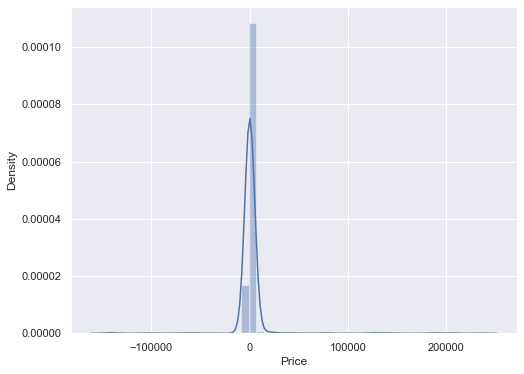

In [89]:
plt.figure(figsize=(8,6))
sns.distplot(y_test-DTR_final)

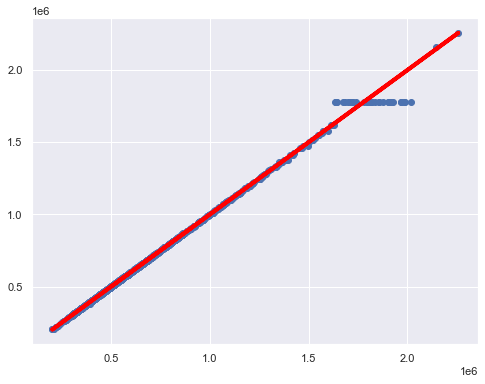

In [90]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,DTR_final)
plt.plot(y_test,y_test,linewidth=4,color='Red')

### SAVING THE MODEL

In [91]:
import joblib
joblib.dump(DTR_final,"final model.pkl")

['final model.pkl']